In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime, date
# from pandas_datareader import data as pdr
import yfinance as yf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [26]:
df = yf.download('ASIANPAINT.NS', '2010-05-01', '2021-06-15')

df = df.dropna()
df = df[['Open', 'High', 'Low', 'Close']]
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close
Date,,,,
2010-05-03,207.000000,209.500000,206.360001,208.425003
2010-05-04,209.779999,209.990005,207.600006,208.809998
2010-05-05,205.399994,207.490005,204.789993,206.059998
2010-05-06,205.214996,206.949997,201.199997,203.369995
2010-05-07,201.029999,209.479996,201.029999,208.625000


In [27]:
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low
df = df.dropna()
X=df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2010-05-03,-1.425003,3.139999
2010-05-04,0.970001,2.389999
2010-05-05,-0.660004,2.700012
2010-05-06,1.845001,5.750000
2010-05-07,-7.595001,8.449997


In [28]:
Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

In [29]:
split_percentage = 0.7
split = int(split_percentage*len(df))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [30]:
knn = KNeighborsClassifier(n_neighbors = 15)

knn.fit(X_train, Y_train)

accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

print('Train_data Accuracy: %2f' %accuracy_train)
print('Test_data Accuracy: %2f' %accuracy_test)

Train_data Accuracy: 0.627931
Test_data Accuracy: 0.489672


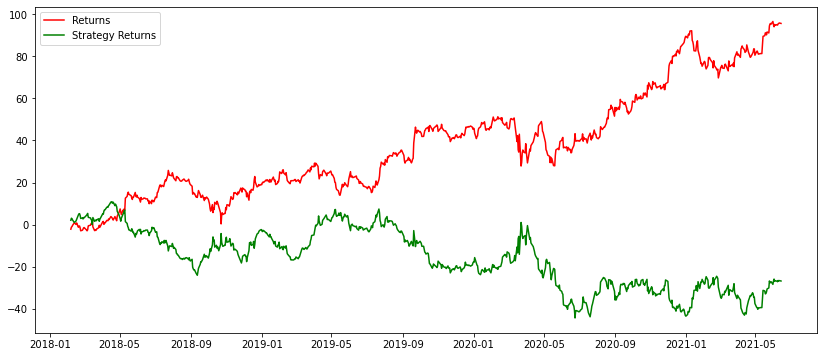

In [31]:
df['Predicted_Signal'] = knn.predict(X)

df['returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Returns = df[split:]['returns'].cumsum()*100

df['Strategy_returns'] = df['returns']*df['Predicted_Signal'].shift(1)
Cumulative_Strategy_Returns = df[split:]['Strategy_returns'].cumsum()*100

plt.figure(figsize=(14,6))
plt.plot(Cumulative_Returns, color='r', label='Returns')
plt.plot(Cumulative_Strategy_Returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

In [32]:
std = Cumulative_Strategy_Returns.std()
Sharpe = (Cumulative_Strategy_Returns - Cumulative_Returns)/std
Sharpe = Sharpe.mean()
print(Sharpe)
print('Sharpe ratio: %2f' %Sharpe)

-3.867781065840339
Sharpe ratio: -3.867781


In [33]:
nifty50 = 'https://www1.nseindia.com/content/indices/ind_nifty50list.csv'
niftynext50 = 'https://www1.nseindia.com/content/indices/ind_niftynext50list.csv'
nifty100 = 'https://www1.nseindia.com/content/indices/ind_nifty100list.csv'
nifty200 = 'https://www1.nseindia.com/content/indices/ind_nifty200list.csv'
nifty500 = 'https://www1.nseindia.com/content/indices/ind_nifty500list.csv'
nifty500multicap = 'https://www1.nseindia.com/content/indices/ind_nifty500Multicap502525_list.csv'
niftymidcap150 = 'https://www1.nseindia.com/content/indices/ind_niftymidcap150list.csv'
niftymidcap50 = 'https://www1.nseindia.com/content/indices/ind_niftymidcap50list.csv'
niftymidcap100 = 'https://www1.nseindia.com/content/indices/ind_niftymidcap100list.csv'
niftysmallcap250 = 'https://www1.nseindia.com/content/indices/ind_niftysmallcap250list.csv'
niftysmallcap50 = 'https://www1.nseindia.com/content/indices/ind_niftysmallcap50list.csv'
niftysmallcap100 = 'https://www1.nseindia.com/content/indices/ind_niftysmallcap100list.csv'
niftymicrocap250 = 'https://www1.nseindia.com/content/indices/ind_niftymicrocap250_list.csv'
niftylargemidcap250 = 'https://www1.nseindia.com/content/indices/ind_niftylargemidcap250list.csv'
niftymidsmallcap400 = 'https://www1.nseindia.com/content/indices/ind_niftymidsmallcap400list.csv'

In [34]:
data = pd.read_csv(nifty50)
data = data[['Symbol']]
data

,Symbol
0,ADANIPORTS
1,ASIANPAINT
2,AXISBANK
3,BAJAJ-AUTO
4,BAJFINANCE
5,BAJAJFINSV
6,BPCL
7,BHARTIARTL
8,BRITANNIA
9,CIPLA


In [35]:
end_date = date.today()

for i in range(0, len(data)):
    Symbol = data.loc[i,'Symbol']
#     print(Symbol)
    ticker = Symbol + '.NS'
    try:
        df = yf.download(ticker, start='2020-01-01', end=end_date)
    except:
        print('excepted')
        continue
    df = df[['Open', 'High', 'Low', 'Close']]
    df['Open-Close'] = df.Open - df.Close
    df['High-Low'] = df.High - df.Low
    df = df.dropna()
    X=df[['Open-Close', 'High-Low']]
    Y = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)
    split_percentage = 0.7
    split = int(split_percentage*len(df))

    X_train = X[:split]
    Y_train = Y[:split]

    X_test = X[split:]
    Y_test = Y[split:]
    knn = KNeighborsClassifier(n_neighbors = 15)

    knn.fit(X_train, Y_train)

    accuracy_train = accuracy_score(Y_train, knn.predict(X_train))
    accuracy_test = accuracy_score(Y_test, knn.predict(X_test))

#     print('Train_data Accuracy: %2f' %accuracy_train)
#     print('Test_data Accuracy: %2f' %accuracy_test)
    
    df['Predicted_Signal'] = knn.predict(X)

    df['returns'] = np.log(df['Close']/df['Close'].shift(1))
    Cumulative_Returns = df[split:]['returns'].cumsum()*100

    df['Strategy_returns'] = df['returns']*df['Predicted_Signal'].shift(1)
    Cumulative_Strategy_Returns = df[split:]['Strategy_returns'].cumsum()*100
    
    std = Cumulative_Strategy_Returns.std()
    Sharpe = (Cumulative_Strategy_Returns - Cumulative_Returns)/std
    Sharpe = Sharpe.mean()
    if(Sharpe > 1):
        print(Symbol)
        print('Sharpe ratio: %2f' %Sharpe)
        print('Train_data Accuracy: %2f' %accuracy_train)
        print('Test_data Accuracy: %2f' %accuracy_test)
        
    

[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
ASIANPAINT
Sharpe ratio: 2.058317
Train_data Accuracy: 0.575397
Test_data Accuracy: 0.513761


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
BRITANNIA
Sharpe ratio: 1.713057
Train_data Accuracy: 0.634921
Test_data Accuracy: 0.550459


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
DRREDDY
Sharpe ratio: 2.375560
Train_data Accuracy: 0.638889
Test_data Accuracy: 0.550459


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
EICHERMOT
Sharpe ratio: 1.751183
Train_data Accuracy: 0.607143
Test_data Accuracy: 0.550459


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
HINDUNILVR
Sharpe ratio: 2.632901
Train_data Accuracy: 0.623016
Test_data Accuracy: 0.568807


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
ITC
Sharpe ratio: 1.979723
Train_data Accuracy: 0.611111
Test_data Accuracy: 0.587156


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
M&M
Sharpe ratio: 2.320133
Train_data Accuracy: 0.626984
Test_data Accuracy: 0.550459


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
MARUTI
Sharpe ratio: 3.167992
Train_data Accuracy: 0.587302
Test_data Accuracy: 0.605505


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
NESTLEIND
Sharpe ratio: 2.727777
Train_data Accuracy: 0.595238
Test_data Accuracy: 0.486239


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
ONGC
Sharpe ratio: 1.526694
Train_data Accuracy: 0.630952
Test_data Accuracy: 0.605505


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed
TITAN
Sharpe ratio: 2.437077
Train_data Accuracy: 0.531746
Test_data Accuracy: 0.577982


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']


[*********************100%***********************]  1 of 1 completed


<ipython-input-35-d42dc189794a>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Open-Close'] = df['Open'] - df['Close']
